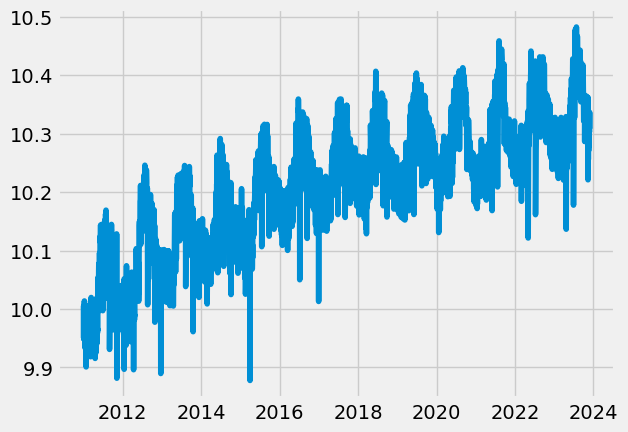

Epoch 1/100
3771/3771 - 2s - loss: 0.0037
Epoch 2/100
3771/3771 - 2s - loss: 0.0030
Epoch 3/100
3771/3771 - 3s - loss: 0.0029
Epoch 4/100
3771/3771 - 3s - loss: 0.0029
Epoch 5/100
3771/3771 - 2s - loss: 0.0029
Epoch 6/100
3771/3771 - 2s - loss: 0.0029
Epoch 7/100
3771/3771 - 2s - loss: 0.0029
Epoch 8/100
3771/3771 - 3s - loss: 0.0028
Epoch 9/100
3771/3771 - 3s - loss: 0.0029
Epoch 10/100
3771/3771 - 2s - loss: 0.0029
Epoch 11/100
3771/3771 - 3s - loss: 0.0028
Epoch 12/100
3771/3771 - 2s - loss: 0.0029
Epoch 13/100
3771/3771 - 2s - loss: 0.0028
Epoch 14/100
3771/3771 - 2s - loss: 0.0028
Epoch 15/100
3771/3771 - 2s - loss: 0.0028
Epoch 16/100
3771/3771 - 2s - loss: 0.0028
Epoch 17/100
3771/3771 - 2s - loss: 0.0029
Epoch 18/100
3771/3771 - 2s - loss: 0.0028
Epoch 19/100
3771/3771 - 2s - loss: 0.0028
Epoch 20/100
3771/3771 - 2s - loss: 0.0028
Epoch 21/100
3771/3771 - 2s - loss: 0.0028
Epoch 22/100
3771/3771 - 2s - loss: 0.0028
Epoch 23/100
3771/3771 - 2s - loss: 0.0028
Epoch 24/100
3771/37

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
plt.style.use("fivethirtyeight")
color_pal=sns.color_palette()
# Veri yüklenir ve görselleştirilir
df = pd.read_excel('rainfall-and-daily-consumption-data-on-istanbul-dams.xlsx')
df = df[["Tarih", "İstanbul günlük tüketim(m³/gün)"]]
df = df.set_index("Tarih")
df.index = pd.to_datetime(df.index)

# Veriyi günlük tüketim miktarına göre bölme
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'] // 100
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'].astype(float)
df = np.log(df)

plt.plot(df)
plt.show()

# Veriyi normalize etme
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

# Eğitim ve test veri setlerini oluşturma
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# X ve y veri setlerini oluşturma
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i - look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Modeli tanımlama ve derleme
model_ann = Sequential([
    Dense(64, input_dim=look_back, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model_ann.compile(loss='mean_squared_error', optimizer='adam')

# Modeli eğitme
history = model_ann.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Tahmin yapma
trainPredict = model_ann.predict(trainX)
testPredict = model_ann.predict(testX)

# Tahminleri ters dönüştürme
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

mse = mean_squared_error(testY[0], testPredict[:,0])
mae = mean_absolute_error(testY[0], testPredict[:,0])
mape = np.mean(np.abs((testY[0]- testPredict[:,0])) / testY[0])*100
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))


print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("Mean Absolute Error (MAE): {:.4f}".format(mae))
print("Root Mean Squared Error (RMSE): {:.4f}".format(testScore))
print("Mean Absolute Percentage Error (MAPE): {:.4f}".format(mape))
